In [1]:
"""
ECGR 5105 - Intro to Machine Learning
Homework 5, Part 2
Phillip Harmon
""";


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch


In [3]:
#Normalization Functions
def normalize(x, xmax, xmin):
    return (x - xmin) / (xmax - xmin)

def denormalize(x, xmax, xmin):
    return (x * (xmax - xmin)) + xmin


In [4]:
#Define the linear model
def model_linear(x, w):
    values = torch.column_stack((x, torch.ones(x.size(dim=0))))
    return (w * values).sum(1)

#Define the loss function
def cost(y_p, y):
    square_error = (y_p - y)**2
    return square_error.mean()

#Define Forward Pass Function
def forward_pass(x, y, params, model=model_linear, enable_grad=True):
    with torch.set_grad_enabled(enable_grad):
        loss = cost( model(x, params) , y)
    return loss


In [5]:
#helper for plotting visualization of training data
def training_visual(loss_t, loss_v, model, params, x, y):
    plt.rcParams["figure.figsize"] = (10,5)
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Convergence of Training')
    plt.plot(range(1,len(loss_t) + 1),loss_t, color='blue', label='Training Loss')
    plt.plot(range(1,len(loss_t) + 1),loss_v, color='red', label='Validation Loss')
    plt.legend()
    plt.ylim([0.0,0.25])
    plt.show()
    print("Final Training Loss = {} | Final Validation Loss = {}".format(loss_t[-1], loss_v[-1]))
    
    x_n = normalize(x, x.max(0,keepdim=True)[0], x.min(0,keepdim=True)[0])
    y_n = normalize(y, y.max(0,keepdim=True)[0], y.min(0,keepdim=True)[0])
    print("Model MSE Loss for whole dataset = {}".format(cost(model(x_n,params) , y_n)))


In [6]:
#Define the Training Loop
def train_loop(params, x_t, y_t, x_v, y_v, model, epochs=5000, learn_rate=1e-2):
    training_loss = []
    validation_loss = []
    for epoch in range(1, epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
    
        loss_t = forward_pass(
            x = x_t,
            y = y_t,
            params = params,
            model = model,
            enable_grad = True)
        
        loss_v = forward_pass(
            x = x_v,
            y = y_v,
            params = params,
            model = model,
            enable_grad = False)
        
        training_loss.append(float(loss_t))
        validation_loss.append(float(loss_v))
        
        loss_t.backward()
        
        with torch.no_grad():
            params -= learn_rate * params.grad
        
        if epoch <= 3 or epoch % 500 == 0:
            print('Epoch {} | Training Loss = {} | Validation Loss = {}'.format(epoch, loss_t, loss_v))

    return params, training_loss, validation_loss


In [7]:
#Define the Training Loop with optimizer
def train_loop_optim(params, x_t, y_t, x_v, y_v, model, optimizer, epochs=5000):
    training_loss = []
    validation_loss = []
    for epoch in range(1, epochs + 1):
    
        loss_t = forward_pass(
            x = x_t,
            y = y_t,
            params = params,
            model = model,
            enable_grad = True)
        
        loss_v = forward_pass(
            x = x_v,
            y = y_v,
            params = params,
            model = model,
            enable_grad = False)
        
        training_loss.append(float(loss_t))
        validation_loss.append(float(loss_v))
        
        optimizer.zero_grad()
        loss_t.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print('Epoch {} | Training Loss = {} | Validation Loss = {}'.format(epoch, loss_t, loss_v))

    return params, training_loss, validation_loss


In [8]:
#Prepare the inputs

#Read in the CSV into a dataframe
csvData = pd.read_csv("./Housing.csv")
csvCols = len(csvData.columns)
csvRows = len(csvData)

#Collect Data
dataLabels = ['price','area','bedrooms','bathrooms','stories','parking']
data = csvData[dataLabels]

y_raw = data.pop('price').values
x_raw = data.values

y_raw = torch.from_numpy(y_raw)
x_raw = torch.from_numpy(x_raw)

#Cleaning the inputs
x = normalize(x_raw, x_raw.max(0,keepdim=True)[0], x_raw.min(0,keepdim=True)[0])
y = normalize(y_raw, y_raw.max(0,keepdim=True)[0], y_raw.min(0,keepdim=True)[0])

#Train/Test Split
validation_percent = 0.2
split = int(validation_percent * x.shape[0])
shuffle_index = torch.randperm(x.shape[0])
index_t = shuffle_index[:-split]
index_v = shuffle_index[-split:]
x_t = x[index_t]
y_t = y[index_t]
x_v = x[index_v]
y_v = y[index_v]

#Define Constructs
epochs = 5000


Learning Rate = 0.1
Epoch 1 | Training Loss = 1.2239868640899658 | Validation Loss = 1.2471128702163696
Epoch 2 | Training Loss = 0.7253420352935791 | Validation Loss = 0.7413965463638306
Epoch 3 | Training Loss = 0.4595836102962494 | Validation Loss = 0.47116509079933167
Epoch 500 | Training Loss = 0.011338168755173683 | Validation Loss = 0.013433423824608326
Epoch 1000 | Training Loss = 0.01107100211083889 | Validation Loss = 0.013250169344246387
Epoch 1500 | Training Loss = 0.011055151000618935 | Validation Loss = 0.01329437643289566
Epoch 2000 | Training Loss = 0.011054002679884434 | Validation Loss = 0.01331313606351614
Epoch 2500 | Training Loss = 0.011053916066884995 | Validation Loss = 0.013318805955350399
Epoch 3000 | Training Loss = 0.011053909547626972 | Validation Loss = 0.01332040410488844
Epoch 3500 | Training Loss = 0.011053909547626972 | Validation Loss = 0.013320842757821083
Epoch 4000 | Training Loss = 0.011053908616304398 | Validation Loss = 0.013320968486368656
Epoc

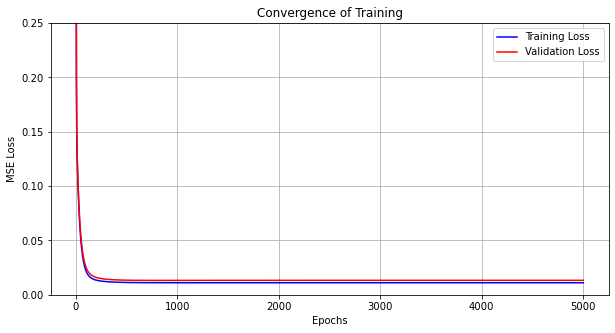

Final Training Loss = 0.011053909547626972 | Final Validation Loss = 0.013321002013981342
Model MSE Loss for whole dataset = 0.011507327668368816


In [9]:
"""LR=1e-1"""
print("Learning Rate = {}".format(1e-1))
param = torch.column_stack((torch.ones(1,x.size(dim=1)), torch.zeros(1)))[0]
param.requires_grad = True
param, loss_t, loss_v = train_loop(
    params = param,
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    learn_rate = 1e-1,
    model = model_linear);

param.requires_grad = False
training_visual(
    loss_t = loss_t,
    loss_v = loss_v,
    model = model_linear,
    params = param,
    x = x_raw,
    y = y_raw)


Learning Rate = 0.01
Epoch 1 | Training Loss = 1.2239868640899658 | Validation Loss = 1.2471128702163696
Epoch 2 | Training Loss = 1.1670957803726196 | Validation Loss = 1.1894673109054565
Epoch 3 | Training Loss = 1.1132428646087646 | Validation Loss = 1.1348906755447388
Epoch 500 | Training Loss = 0.04896058142185211 | Validation Loss = 0.052956003695726395
Epoch 1000 | Training Loss = 0.021924735978245735 | Validation Loss = 0.025351444259285927
Epoch 1500 | Training Loss = 0.015495523810386658 | Validation Loss = 0.01833866350352764
Epoch 2000 | Training Loss = 0.013500482775270939 | Validation Loss = 0.01599494181573391
Epoch 2500 | Training Loss = 0.0126235606148839 | Validation Loss = 0.014928413555026054
Epoch 3000 | Training Loss = 0.012125825509428978 | Validation Loss = 0.014328173361718655
Epoch 3500 | Training Loss = 0.011806707829236984 | Validation Loss = 0.013953054323792458
Epoch 4000 | Training Loss = 0.011591452173888683 | Validation Loss = 0.013707597739994526
Epoch

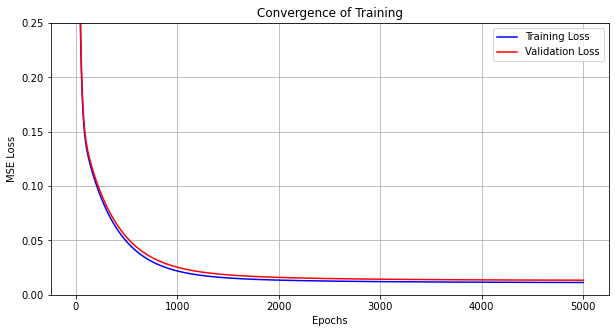

Final Training Loss = 0.011337925679981709 | Final Validation Loss = 0.013433655723929405
Model MSE Loss for whole dataset = 0.0117568951100111


In [10]:
"""LR=1e-2"""
print("Learning Rate = {}".format(1e-2))
param = torch.column_stack((torch.ones(1,x.size(dim=1)), torch.zeros(1)))[0]
param.requires_grad = True
param, loss_t, loss_v = train_loop(
    params = param,
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    learn_rate = 1e-2,
    model = model_linear);

param.requires_grad = False
training_visual(
    loss_t = loss_t,
    loss_v = loss_v,
    model = model_linear,
    params = param,
    x = x,
    y = y)


Learning Rate = 0.001
Epoch 1 | Training Loss = 1.2239868640899658 | Validation Loss = 1.2471128702163696
Epoch 2 | Training Loss = 1.2182273864746094 | Validation Loss = 1.2412774562835693
Epoch 3 | Training Loss = 1.2124992609024048 | Validation Loss = 1.2354736328125
Epoch 500 | Training Loss = 0.22195826470851898 | Validation Loss = 0.2284213751554489
Epoch 1000 | Training Loss = 0.1378132402896881 | Validation Loss = 0.14161814749240875
Epoch 1500 | Training Loss = 0.11642010509967804 | Validation Loss = 0.11988845467567444
Epoch 2000 | Training Loss = 0.10145088285207748 | Validation Loss = 0.10501861572265625
Epoch 2500 | Training Loss = 0.08889636397361755 | Validation Loss = 0.09261579811573029
Epoch 3000 | Training Loss = 0.07819823920726776 | Validation Loss = 0.08204194158315659
Epoch 3500 | Training Loss = 0.06906675547361374 | Validation Loss = 0.07299567759037018
Epoch 4000 | Training Loss = 0.06126762181520462 | Validation Loss = 0.06524623930454254
Epoch 4500 | Trainin

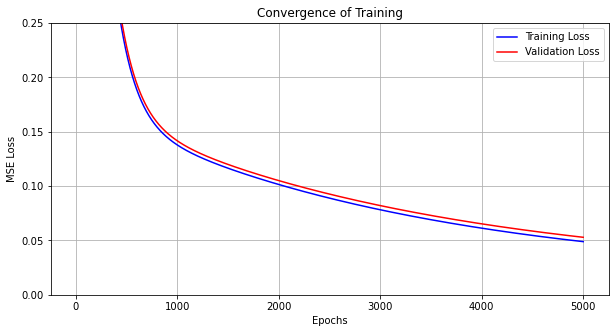

Final Training Loss = 0.04890259727835655 | Final Validation Loss = 0.05289783701300621
Model MSE Loss for whole dataset = 0.04969111457467079


In [11]:
"""LR=1e-3"""
print("Learning Rate = {}".format(1e-3))
param = torch.column_stack((torch.ones(1,x.size(dim=1)), torch.zeros(1)))[0]
param.requires_grad = True
param, loss_t, loss_v = train_loop(
    params = param,
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    learn_rate = 1e-3,
    model = model_linear);

param.requires_grad = False
training_visual(
    loss_t = loss_t,
    loss_v = loss_v,
    model = model_linear,
    params = param,
    x = x,
    y = y)


Learning Rate = 0.0001
Epoch 1 | Training Loss = 1.2239868640899658 | Validation Loss = 1.2471128702163696
Epoch 2 | Training Loss = 1.2234102487564087 | Validation Loss = 1.2465283870697021
Epoch 3 | Training Loss = 1.2228338718414307 | Validation Loss = 1.245944619178772
Epoch 500 | Training Loss = 0.9717539548873901 | Validation Loss = 0.9914497137069702
Epoch 1000 | Training Loss = 0.7787889838218689 | Validation Loss = 0.7956739068031311
Epoch 1500 | Training Loss = 0.6313768029212952 | Validation Loss = 0.6459552645683289
Epoch 2000 | Training Loss = 0.5186406970024109 | Validation Loss = 0.5313202738761902
Epoch 2500 | Training Loss = 0.43230369687080383 | Validation Loss = 0.4434148371219635
Epoch 3000 | Training Loss = 0.3660649359226227 | Validation Loss = 0.37587693333625793
Epoch 3500 | Training Loss = 0.3151301443576813 | Validation Loss = 0.3238632082939148
Epoch 4000 | Training Loss = 0.27585095167160034 | Validation Loss = 0.28368592262268066
Epoch 4500 | Training Loss 

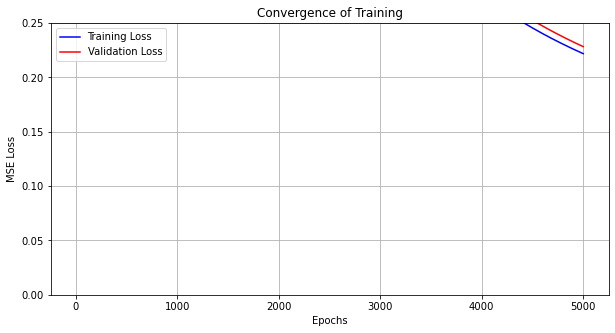

Final Training Loss = 0.22181402146816254 | Final Validation Loss = 0.22827421128749847
Model MSE Loss for whole dataset = 0.22306419909000397


In [12]:
"""LR=1e-4"""
print("Learning Rate = {}".format(1e-4))
param = torch.column_stack((torch.ones(1,x.size(dim=1)), torch.zeros(1)))[0]
param.requires_grad = True
param, loss_t, loss_v = train_loop(
    params = param,
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    learn_rate = 1e-4,
    model = model_linear);

param.requires_grad = False
training_visual(
    loss_t = loss_t,
    loss_v = loss_v,
    model = model_linear,
    params = param,
    x = x,
    y = y)


Epoch 1 | Training Loss = 1.2239868640899658 | Validation Loss = 1.2471128702163696
Epoch 2 | Training Loss = 0.7801061272621155 | Validation Loss = 0.7957643270492554
Epoch 3 | Training Loss = 0.4473039209842682 | Validation Loss = 0.4572403132915497
Epoch 500 | Training Loss = 0.011053908616304398 | Validation Loss = 0.013321008533239365
Epoch 1000 | Training Loss = 0.011053909547626972 | Validation Loss = 0.01332100946456194
Epoch 1500 | Training Loss = 0.011053909547626972 | Validation Loss = 0.01332100946456194
Epoch 2000 | Training Loss = 0.011053909547626972 | Validation Loss = 0.01332100946456194
Epoch 2500 | Training Loss = 0.011053909547626972 | Validation Loss = 0.01332100946456194
Epoch 3000 | Training Loss = 0.011053909547626972 | Validation Loss = 0.013321010395884514
Epoch 3500 | Training Loss = 0.011053908616304398 | Validation Loss = 0.01332100946456194
Epoch 4000 | Training Loss = 0.011053909547626972 | Validation Loss = 0.013321010395884514
Epoch 4500 | Training Loss

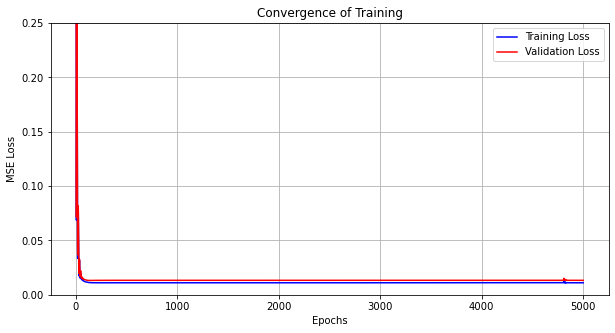

Final Training Loss = 0.011053909547626972 | Final Validation Loss = 0.013321006670594215
Model MSE Loss for whole dataset = 0.01150733046233654


In [13]:
"""Adam Optimizer, LR=1e-1"""
param = torch.column_stack((torch.ones(1,x.size(dim=1)), torch.zeros(1)))[0]
param.requires_grad = True
optimizer = torch.optim.Adam([param], lr=1e-1)
param, loss_t, loss_v = train_loop_optim(
    params = param,
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    optimizer = optimizer,
    model = model_linear);

param.requires_grad = False
training_visual(
    loss_t = loss_t,
    loss_v = loss_v,
    model = model_linear,
    params = param,
    x = x_raw,
    y = y_raw)


Epoch 1 | Training Loss = 1.2239868640899658 | Validation Loss = 1.2471128702163696
Epoch 2 | Training Loss = 0.7253420352935791 | Validation Loss = 0.7413965463638306
Epoch 3 | Training Loss = 0.4595836102962494 | Validation Loss = 0.47116509079933167
Epoch 500 | Training Loss = 0.011338168755173683 | Validation Loss = 0.013433423824608326
Epoch 1000 | Training Loss = 0.01107100211083889 | Validation Loss = 0.013250169344246387
Epoch 1500 | Training Loss = 0.011055151000618935 | Validation Loss = 0.01329437643289566
Epoch 2000 | Training Loss = 0.011054002679884434 | Validation Loss = 0.01331313606351614
Epoch 2500 | Training Loss = 0.011053916066884995 | Validation Loss = 0.013318805955350399
Epoch 3000 | Training Loss = 0.011053909547626972 | Validation Loss = 0.01332040410488844
Epoch 3500 | Training Loss = 0.011053909547626972 | Validation Loss = 0.013320842757821083
Epoch 4000 | Training Loss = 0.011053908616304398 | Validation Loss = 0.013320968486368656
Epoch 4500 | Training Lo

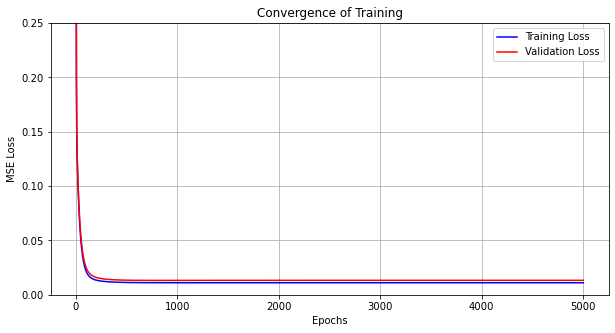

Final Training Loss = 0.011053909547626972 | Final Validation Loss = 0.013321002013981342
Model MSE Loss for whole dataset = 0.011507327668368816


In [14]:
"""SGD Optimizer, LR=1e-1"""
param = torch.column_stack((torch.ones(1,x.size(dim=1)), torch.zeros(1)))[0]
param.requires_grad = True
optimizer = torch.optim.SGD([param], lr=1e-1)
param, loss_t, loss_v = train_loop_optim(
    params = param,
    x_t = x_t,
    y_t = y_t,
    x_v = x_v,
    y_v = y_v,
    epochs = epochs,
    optimizer = optimizer,
    model = model_linear);

param.requires_grad = False
training_visual(
    loss_t = loss_t,
    loss_v = loss_v,
    model = model_linear,
    params = param,
    x = x_raw,
    y = y_raw)
